In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from statannotations.Annotator import Annotator

import json

In [5]:
train_values_df = pd.read_csv('./results/cartography_disco.csv')
train_values_df.head()

,text_id,annotator_id,label_0,label_1,pred_label_0,pred_label_1,epoch_no
0,3329.0,98.0,0.0,1.0,0.507486,0.492514,1.0
1,4091.0,58.0,1.0,0.0,0.535002,0.464998,1.0
2,7248.0,2.0,1.0,0.0,0.518050,0.481950,1.0
3,2234.0,211.0,1.0,0.0,0.416616,0.583384,1.0
4,8366.0,773.0,1.0,0.0,0.484292,0.515708,1.0


In [6]:
len(train_values_df['text_id'].unique())

8357

In [9]:
with open('./results/agree_to_disagree_train.json', 'r') as file:
    data = json.load(file)

In [11]:
data['columns']

['comment_id',
 'Text',
 'Agreement_level',
 'Individual_Annotations',
 'Offensive_binary_label',
 'Annotators_ID',
 'Domain',
 'annotation',
 'annotator_id',
 'Clean_Text',
 'label',
 'label_vector',
 'message',
 'Aindex',
 'Mindex']

In [17]:
full_df = pd.DataFrame(data['data'])
full_df.columns = data['columns']
full_df.head()

,comment_id,Text,Agreement_level,Individual_Annotations,Offensive_binary_label,Annotators_ID,Domain,annotation,annotator_id,Clean_Text,label,label_vector,message,Aindex,Mindex
0,3_train,<user> <user> <user> <user> Um the Kurds are h...,A+,0,"0,0,0,0,1","Ann425,Ann511,Ann779,Ann420,Ann721",Elections2020,0,Ann425,Um the Kurds are helping the ppl Of the Uk...,0,0,Um the Kurds are helping the ppl Of the Uk...,10,2
1,3_train,<user> <user> <user> <user> Um the Kurds are h...,A+,0,"0,0,0,0,1","Ann425,Ann511,Ann779,Ann420,Ann721",Elections2020,0,Ann511,Um the Kurds are helping the ppl Of the Uk...,0,0,Um the Kurds are helping the ppl Of the Uk...,11,2
2,3_train,<user> <user> <user> <user> Um the Kurds are h...,A+,0,"0,0,0,0,1","Ann425,Ann511,Ann779,Ann420,Ann721",Elections2020,0,Ann779,Um the Kurds are helping the ppl Of the Uk...,0,0,Um the Kurds are helping the ppl Of the Uk...,7,2
3,3_train,<user> <user> <user> <user> Um the Kurds are h...,A+,0,"0,0,0,0,1","Ann425,Ann511,Ann779,Ann420,Ann721",Elections2020,0,Ann420,Um the Kurds are helping the ppl Of the Uk...,0,0,Um the Kurds are helping the ppl Of the Uk...,12,2
4,3_train,<user> <user> <user> <user> Um the Kurds are h...,A+,0,"0,0,0,0,1","Ann425,Ann511,Ann779,Ann420,Ann721",Elections2020,1,Ann721,Um the Kurds are helping the ppl Of the Uk...,1,1,Um the Kurds are helping the ppl Of the Uk...,13,2


In [24]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41785 entries, 0 to 41784
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   comment_id              41785 non-null  object
 1   Text                    41785 non-null  object
 2   Agreement_level         41785 non-null  object
 3   Individual_Annotations  41785 non-null  int64 
 4   Offensive_binary_label  41785 non-null  object
 5   Annotators_ID           41785 non-null  object
 6   Domain                  41785 non-null  object
 7   annotation              41785 non-null  int64 
 8   annotator_id            41785 non-null  object
 9   Clean_Text              41785 non-null  object
 10  label                   41785 non-null  int64 
 11  label_vector            41785 non-null  int64 
 12  message                 41785 non-null  object
 13  Aindex                  41785 non-null  int64 
 14  Mindex                  41785 non-null  int64 
dtypes:

Retaining only 5 epochs

In [19]:
train_values_df = train_values_df[train_values_df['epoch_no'] < 6]
train_values_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208925 entries, 0 to 208924
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   text_id       208925 non-null  float64
 1   annotator_id  208925 non-null  float64
 2   label_0       208925 non-null  float64
 3   label_1       208925 non-null  float64
 4   pred_label_0  208925 non-null  float64
 5   pred_label_1  208925 non-null  float64
 6   epoch_no      208925 non-null  float64
dtypes: float64(7)
memory usage: 12.8 MB


In [35]:
len(train_values_df[['text_id', 'annotator_id']].drop_duplicates())

41785

In [37]:
train_values_df['text_id'] = train_values_df['text_id'].astype(int)
train_values_df['annotator_id'] = train_values_df['annotator_id'].astype(int)

In [40]:
train_values_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208925 entries, 0 to 208924
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   text_id       208925 non-null  int64  
 1   annotator_id  208925 non-null  int64  
 2   label_0       208925 non-null  float64
 3   label_1       208925 non-null  float64
 4   pred_label_0  208925 non-null  float64
 5   pred_label_1  208925 non-null  float64
 6   epoch_no      208925 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 12.8 MB


In [41]:
merged_df = pd.merge(train_values_df, full_df[['comment_id', 'Text', 'Agreement_level', 'Individual_Annotations', 'Offensive_binary_label', 'Annotators_ID', 'Domain', 'annotation', 'annotator_id', 'Clean_Text', 'label', 'label_vector', 'message', 'Aindex', 'Mindex']], how='left', left_on=['annotator_id', 'text_id'], right_on=['Aindex', 'Mindex'])
merged_df.head()

,text_id,annotator_id_x,label_0,label_1,pred_label_0,pred_label_1,epoch_no,comment_id,Text,Agreement_level,...,Annotators_ID,Domain,annotation,annotator_id_y,Clean_Text,label,label_vector,message,Aindex,Mindex
0,3329,98,0.0,1.0,0.507486,0.492514,1.0,3330_train,<user> <user> <user> Wouldn't they have to hav...,A+,...,"Ann490,Ann425,Ann104,Ann149,Ann379",Elections2020,1,Ann379,Wouldn't they have to have a record to run ...,1,1,Wouldn't they have to have a record to run ...,98,3329
1,4091,58,1.0,0.0,0.535002,0.464998,1.0,4092_train,#China is using its economic might to push sta...,A0,...,"Ann64,Ann188,Ann266,Ann581,Ann34",Covid-19,0,Ann188,#China is using its economic might to push sta...,0,0,#China is using its economic might to push sta...,58,4091
2,7248,2,1.0,0.0,0.518050,0.481950,1.0,720_dev,<url> okay anyways <url>,A++,...,"Ann13,Ann493,Ann149,Ann25,Ann171",BLM,0,Ann149,<url> okay anyways <url>,0,0,<url> okay anyways <url>,2,7248
3,2234,211,1.0,0.0,0.416616,0.583384,1.0,2235_train,<user> <user> <user> Totally made up slander ...,A++,...,"Ann623,Ann216,Ann368,Ann125,Ann736",BLM,0,Ann623,Totally made up slander <url>,0,0,Totally made up slander <url>,211,2234
4,8366,773,1.0,0.0,0.484292,0.515708,1.0,850_test,This just in. White plantation owner threatens...,A+0,...,"Ann229,Ann236,Ann432,Ann110,Ann408",BLM,0,Ann432,This just in. White plantation owner threatens...,0,0,This just in. White plantation owner threatens...,773,8366


In [42]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208925 entries, 0 to 208924
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   text_id                 208925 non-null  int64  
 1   annotator_id_x          208925 non-null  int64  
 2   label_0                 208925 non-null  float64
 3   label_1                 208925 non-null  float64
 4   pred_label_0            208925 non-null  float64
 5   pred_label_1            208925 non-null  float64
 6   epoch_no                208925 non-null  float64
 7   comment_id              208925 non-null  object 
 8   Text                    208925 non-null  object 
 9   Agreement_level         208925 non-null  object 
 10  Individual_Annotations  208925 non-null  int64  
 11  Offensive_binary_label  208925 non-null  object 
 12  Annotators_ID           208925 non-null  object 
 13  Domain                  208925 non-null  object 
 14  annotation          

In [44]:
def get_pred(label_0, label_1):
    if label_0 > label_1:
        return 0
    else:
        return 1

In [45]:
merged_df['pred'] = merged_df.apply(lambda row: get_pred(row.pred_label_0, row.pred_label_1), axis=1)
merged_df.head()

,text_id,annotator_id_x,label_0,label_1,pred_label_0,pred_label_1,epoch_no,comment_id,Text,Agreement_level,...,Domain,annotation,annotator_id_y,Clean_Text,label,label_vector,message,Aindex,Mindex,pred
0,3329,98,0.0,1.0,0.507486,0.492514,1.0,3330_train,<user> <user> <user> Wouldn't they have to hav...,A+,...,Elections2020,1,Ann379,Wouldn't they have to have a record to run ...,1,1,Wouldn't they have to have a record to run ...,98,3329,0
1,4091,58,1.0,0.0,0.535002,0.464998,1.0,4092_train,#China is using its economic might to push sta...,A0,...,Covid-19,0,Ann188,#China is using its economic might to push sta...,0,0,#China is using its economic might to push sta...,58,4091,0
2,7248,2,1.0,0.0,0.518050,0.481950,1.0,720_dev,<url> okay anyways <url>,A++,...,BLM,0,Ann149,<url> okay anyways <url>,0,0,<url> okay anyways <url>,2,7248,0
3,2234,211,1.0,0.0,0.416616,0.583384,1.0,2235_train,<user> <user> <user> Totally made up slander ...,A++,...,BLM,0,Ann623,Totally made up slander <url>,0,0,Totally made up slander <url>,211,2234,1
4,8366,773,1.0,0.0,0.484292,0.515708,1.0,850_test,This just in. White plantation owner threatens...,A+0,...,BLM,0,Ann432,This just in. White plantation owner threatens...,0,0,This just in. White plantation owner threatens...,773,8366,1


In [55]:
merged_df[merged_df['Mindex']==15][['label', 'annotation', 'Aindex']]

,label,annotation,Aindex
6775,0,0,14
20644,0,0,50
23304,0,0,53
28680,1,1,51
34712,1,1,52
58054,1,1,51
72116,0,0,14
72260,1,1,52
81056,0,0,53
82549,0,0,50


In [46]:
def get_confidence(label, label_0_mean, label_1_mean):
    if label == 0:
        return label_0_mean
    else:
        return label_1_mean

def get_variability(label, label_0_std, label_1_std):
    if label == 0:
        return label_0_std
    else: return label_1_std

def get_correctness(label, label_0_last, label_1_last):
    if label == 0:
        return label_0_last
    else:
        return label_1_last

In [49]:
metrics = ['mean', 'std', 'last']
def build_cartography_df(train_values_df):
    agg_df = train_values_df.sort_values(['epoch_no']).groupby(['Aindex', 'Mindex'], as_index=False).agg({'Text': 'first', 'pred_label_0': metrics, 'pred_label_1': metrics, 'label': 'first', 'pred': 'last', 'Agreement_level': 'first', 'annotator_id_y': 'first', 'comment_id': 'first'})
    agg_df.columns = ['Aindex', 'Mindex', 'text', 'label_0_mean', 'label_0_std', 'label_0_last', 'label_1_mean', 'label_1_std', 'label_1_last', 'label', 'pred', 'agreement_level', 'annotator_id', 'comment_id']

    agg_df['confidence'] = agg_df.apply(lambda row: get_confidence(row.label, row.label_0_mean, row.label_1_mean), axis=1)
    agg_df['variability'] = agg_df.apply(lambda row: get_variability(row.label, row.label_0_std, row.label_1_std), axis=1)
    agg_df['correctness'] = agg_df.apply(lambda row: get_correctness(row.label, row.label_0_last, row.label_1_last), axis=1)
    agg_df['is_correct'] = np.where((agg_df['label'] == agg_df['pred']), True, False)

    return agg_df

In [50]:
cartography_df = build_cartography_df(merged_df)
cartography_df.head()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,agreement_level,annotator_id,comment_id,confidence,variability,correctness,is_correct
0,0,519,"<user> <user> Sorry, which old man?",0.909335,0.087134,0.977597,0.090665,0.087134,0.022403,0,0,A++,Ann418,520_train,0.909335,0.087134,0.977597,True
1,0,669,<user> <user> CNN &amp; MSNBC &amp; the Democr...,0.197979,0.250169,0.026904,0.802021,0.250169,0.973096,1,1,A++,Ann418,670_train,0.802021,0.250169,0.973096,True
2,0,679,<user> <user> <user> President Trump spent his...,0.296290,0.195163,0.276914,0.703710,0.195163,0.723086,1,1,A+0,Ann418,680_train,0.703710,0.195163,0.723086,True
3,0,779,<user> Fuck off you have enough money,0.146111,0.130054,0.160468,0.853889,0.130054,0.839532,1,1,A++,Ann418,780_train,0.853889,0.130054,0.839532,True
4,0,956,<user> <user> Lol. Y’all’s are probably one of...,0.118437,0.148331,0.075402,0.881563,0.148331,0.924598,1,1,A+0,Ann418,957_train,0.881563,0.148331,0.924598,True


In [56]:
cartography_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41785 entries, 0 to 41784
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Aindex           41785 non-null  int64  
 1   Mindex           41785 non-null  int64  
 2   text             41785 non-null  object 
 3   label_0_mean     41785 non-null  float64
 4   label_0_std      41785 non-null  float64
 5   label_0_last     41785 non-null  float64
 6   label_1_mean     41785 non-null  float64
 7   label_1_std      41785 non-null  float64
 8   label_1_last     41785 non-null  float64
 9   label            41785 non-null  int64  
 10  pred             41785 non-null  int64  
 11  agreement_level  41785 non-null  object 
 12  annotator_id     41785 non-null  object 
 13  comment_id       41785 non-null  object 
 14  confidence       41785 non-null  float64
 15  variability      41785 non-null  float64
 16  correctness      41785 non-null  float64
 17  is_correct  

In [78]:
 cartography_df['Aindex'].value_counts()


7      1581
2       874
36      792
69      770
64      700
       ... 
625       1
669       1
639       1
655       1
645       1
Name: Aindex, Length: 819, dtype: int64

In [79]:
cartography_df_ann_7 = cartography_df[cartography_df['Aindex']==57].copy()
cartography_df_ann_7

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,agreement_level,annotator_id,comment_id,confidence,variability,correctness,is_correct
12448,57,17,Words fail me...this is awful..just awful #Hea...,0.994015,0.006534,0.999987,0.005985,0.006534,1.294456e-05,0,0,A++,Ann171,18_train,0.994015,0.006534,0.999987,True
12449,57,53,Wow! Folks in London are running the cops off ...,0.968751,0.039533,0.993297,0.031249,0.039533,6.703199e-03,0,0,A++,Ann171,54_train,0.968751,0.039533,0.993297,True
12450,57,54,STOP SCROLLING his name was George Floyd and...,0.973937,0.036017,0.999997,0.026063,0.036017,2.789735e-06,0,0,A++,Ann171,55_train,0.973937,0.036017,0.999997,True
12451,57,219,Peaceful Protest at Hyde Park <user> Legend ✊🏾...,0.998592,0.001733,0.999970,0.001408,0.001733,2.970295e-05,0,0,A++,Ann171,220_train,0.998592,0.001733,0.999970,True
12452,57,240,White liberals are the new black. #AntifaTerro...,0.959782,0.035933,0.998631,0.040218,0.035933,1.369484e-03,0,0,A0,Ann171,241_train,0.959782,0.035933,0.998631,True
12453,57,241,This should serve as a precedence for all the ...,0.942140,0.115085,0.999721,0.057860,0.115085,2.785919e-04,0,0,A++,Ann171,242_train,0.942140,0.115085,0.999721,True
12454,57,258,Gross. I can’t even watch it. #WeNeedJustice,0.995838,0.005806,0.999888,0.004162,0.005806,1.120493e-04,0,0,A++,Ann171,259_train,0.995838,0.005806,0.999888,True
12455,57,294,THIS ISN'T OVER!! BLM ISN'T A TREND!! KEEP FIG...,0.986538,0.023266,0.999997,0.013462,0.023266,2.648179e-06,0,0,A++,Ann171,295_train,0.986538,0.023266,0.999997,True
12456,57,620,"<user> <user> A start, maybe. But Minneapolis ...",0.972085,0.058578,1.000000,0.027915,0.058578,4.819249e-08,0,0,A++,Ann171,621_train,0.972085,0.058578,1.000000,True
12457,57,1057,George Floyd protests: Trudeau's epic pause wh...,0.995106,0.005694,0.999982,0.004894,0.005694,1.782248e-05,0,0,A++,Ann171,1058_train,0.995106,0.005694,0.999982,True


In [80]:
len(cartography_df_ann_7['Mindex'].unique())

46

In [82]:
# def round_agree_factor(agr_factor):
#     if agr_factor <= 0.6:
#         return 0.6
#     elif agr_factor <= 0.8:
#         return 0.8
#     return 1.0

# cartography_df['agreement_factor_rd'] = cartography_df['agreement_factor'].apply(lambda x: round_agree_factor(x))
# cartography_df.head()

(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.1, '1.1')])

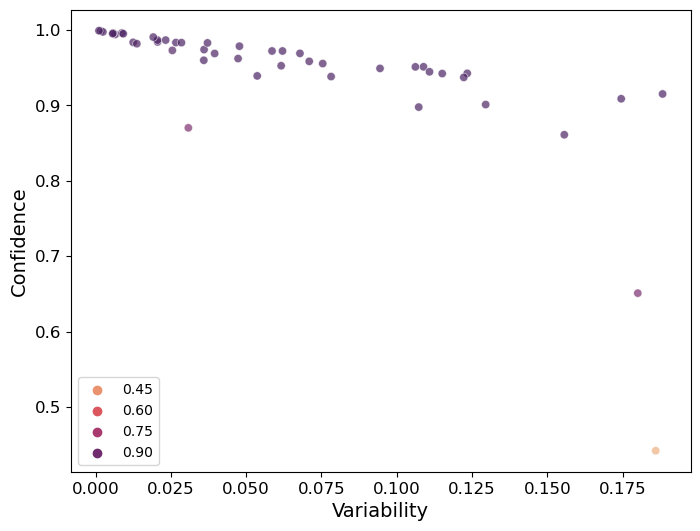

In [83]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df_ann_7, x="variability", y="confidence", hue='correctness', palette='flare', alpha=0.7)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.legend(title='Agreement Factor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig("./plots/conf_vs_var_color_agreement_factor.png", dpi=600, bbox_inches='tight')

In [84]:
comment_ids = cartography_df_ann_7['comment_id'].values.tolist()

In [85]:
len(comment_ids)

46

In [86]:
cartography_majority = pd.read_csv('./results/cartography_majority.csv')
cartography_majority.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,agreement_level,agreement_factor,comment_id,confidence,variability,correctness,is_correct,agreement_factor_rd
0,0,MR OBAMA IF YOUR COMPLAINING ABOUT THE WAY TH...,0.776900,0.195709,0.997088,0.223100,0.195709,0.002912,0,0,A+,0.8,1000_test,0.776900,0.195709,0.997088,True,0.8
1,1,The High Priest of COVID-19 Speaks.... Bill G...,0.396611,0.357260,0.045499,0.603389,0.357260,0.954501,1,1,A+0,0.6,1000_train,0.603389,0.357260,0.954501,True,0.6
2,2,Do you know what sarcasm means?,0.935119,0.067998,0.998300,0.064881,0.067998,0.001700,0,0,A++,1.0,1001_test,0.935119,0.067998,0.998300,True,1.0
3,3,"Politicians, not scientists. Like we are goin...",0.764697,0.204913,0.991857,0.235303,0.204913,0.008143,0,0,A++,1.0,1001_train,0.764697,0.204913,0.991857,True,1.0
4,4,Four more years of tRump &amp; our country ...,0.863673,0.200856,0.997282,0.136327,0.200856,0.002718,0,0,A0,0.6,1002_dev,0.863673,0.200856,0.997282,True,0.6


In [87]:
cartography_majority_ann_7 = cartography_majority[cartography_majority.comment_id.isin(comment_ids)]
cartography_majority_ann_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 150 to 8132
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   text_id              46 non-null     int64  
 1   text                 46 non-null     object 
 2   label_0_mean         46 non-null     float64
 3   label_0_std          46 non-null     float64
 4   label_0_last         46 non-null     float64
 5   label_1_mean         46 non-null     float64
 6   label_1_std          46 non-null     float64
 7   label_1_last         46 non-null     float64
 8   label                46 non-null     int64  
 9   pred                 46 non-null     int64  
 10  agreement_level      46 non-null     object 
 11  agreement_factor     46 non-null     float64
 12  comment_id           46 non-null     object 
 13  confidence           46 non-null     float64
 14  variability          46 non-null     float64
 15  correctness          46 non-null     f

(array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0.5, '0.5'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.7, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.1, '1.1')])

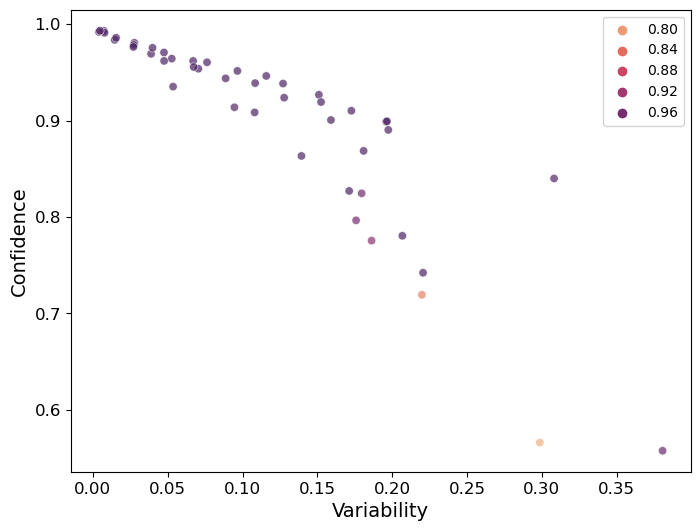

In [88]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_majority_ann_7, x="variability", y="confidence", hue='correctness', palette='flare', alpha=0.7)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.legend(title='Agreement Factor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)